In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load csv files
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Handwritten Digit Recognition /Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Handwritten Digit Recognition /Dataset/test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Shuffeling training data
train_shuffled = shuffle(train.values, random_state=0)

# Extracting features as X and labels as y for train and test data
X = train.drop(labels = ["label"],axis = 1) 
y = train["label"]

# Loading prediction data (no labels are provided)
X_predict = test.values

print(f'X = {X.shape}, y = {y.shape}, X_predict = {X_predict.shape}')

X = (42000, 784), y = (42000,), X_predict = (28000, 784)


In [18]:
# Split data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

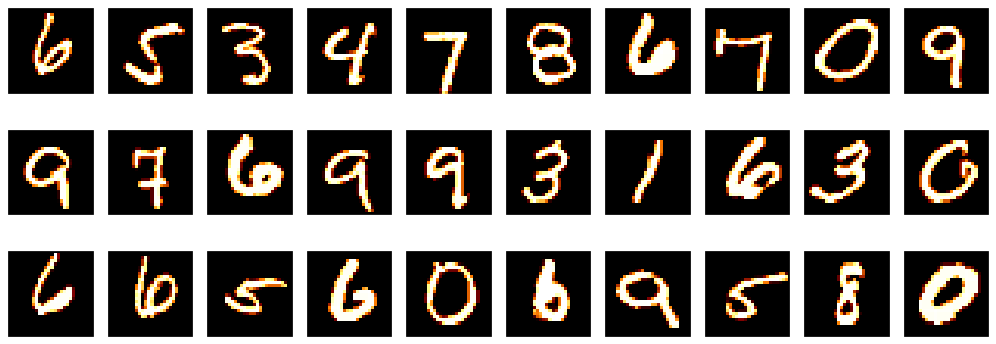

In [19]:
#Data visualization
plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = X_train.iloc[digit_num].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [21]:
# Normalization of data

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [22]:
# Dimensionality Reduction with PCA (Principal Component Analysis)

pca = PCA(n_components=0.90)
pca_X_train = pca.fit_transform(normalized_X_train)
pca_X_test = pca.transform(normalized_X_test)
print(f'{pca.explained_variance_} \n Number of PCA Vectors = {len(pca.explained_variance_)}' )

[20.63862104 15.05926213 13.04427874 11.38431021 10.33450295  9.16068342
  6.92108219  6.11023623  5.85253543  4.91989162  4.42125349  4.32420988
  3.60736337  3.55542405  3.34739506  3.14305588  2.79477049  2.71205236
  2.49965262  2.43164329  2.2727618   2.16344312  2.04179736  1.93759893
  1.8687763   1.76065528  1.72166805  1.63772873  1.56729375  1.46450657
  1.39590565  1.33752468  1.27416318  1.24357092  1.18675001  1.14034514
  1.07285441  1.02895534  0.99542521  0.98128026  0.95579205  0.9379824
  0.87980921  0.83570041  0.81028381  0.78815509  0.76191454  0.73690542
  0.70592851  0.67173318  0.66369334  0.64896957  0.61756547  0.6052865
  0.58958097  0.56890129  0.55960862  0.5420965   0.53410083  0.51804769
  0.50811381  0.50504375  0.47926749  0.46816011  0.45330905  0.43474036
  0.42609251  0.41466011  0.40898273  0.39762333  0.39207454  0.38392444
  0.37009488  0.36453934  0.34889648  0.34448541  0.33757996  0.32495246
  0.30991158  0.29988435  0.29778643  0.2951976   0.2

In [23]:
#New X_train and y_train
print(pca_X_train.shape)
print(pca_X_test.shape)

(33600, 87)
(8400, 87)


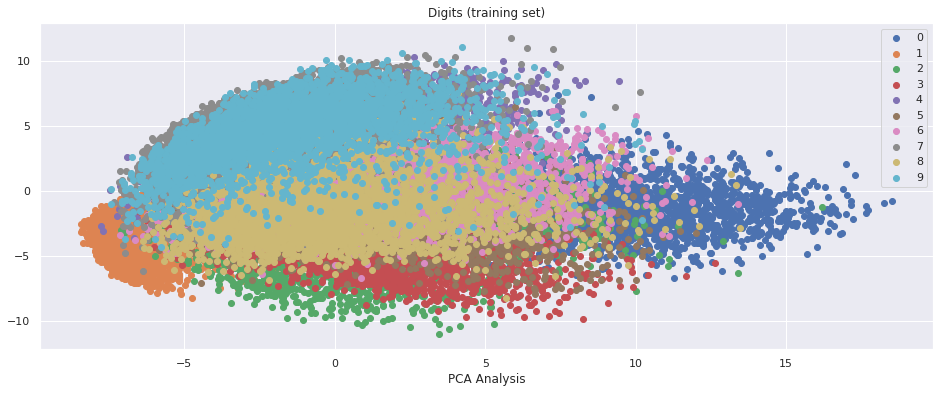

In [24]:
# PCA sactter graph
f, ax = plt.subplots(1, 1)
for i in range(10):
  ax.scatter(pca_X_train[y_train == i, 0], pca_X_train[y_train == i, 1], label=i)
ax.set_xlabel("PCA Analysis")
ax.legend()
f.set_size_inches(16, 6)
ax.set_title("Digits (training set)")
plt.show()

In [26]:
#Fit model
from sklearn.svm import SVC

classifier = svm.SVC(gamma=1, C=3)
classifier.fit(pca_X_train, y_train)

SVC(C=2.82842712475, gamma=0.00728932024638)

In [31]:
#Accuracy for test data
test_accuracy = classifier.score(pca_X_test, y_test)
print (f"Accuracy: {test_accuracy*100:.3f}%")

Accuracy: 98.262%


In [36]:
# Getting predictions 
predictions = classifier.predict(pca_X_test)
predictions[:5]

array([8, 1, 9, 9, 8])